In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import pandas as pd
import random
from sklearn.preprocessing import MinMaxScaler

sys.path.append(os.path.abspath('../src/'))
from ActivationFunctions import *
from NeuralNetwork import *
from nn_utils import *

In [2]:
def multy_plot(datas, labels, title, scale='linear'):
    x = np.arange(0, len(datas[0])).tolist()

    for i, el in enumerate(datas):
        plt.plot(x, el, label=labels[i])


    plt.title(title)
    plt.grid()
    plt.legend()
    plt.yscale(scale)
    plt.show()

In [3]:
def create_dataset(n_items, n_input, input_range, output_functions, seed):
    random.seed(seed)

    n_output = len(output_functions)
    x = np.ndarray((n_items, n_input + n_output))

    for i in range(n_items):
        for l in range(n_input):
            x[i,l] = random.randrange(input_range[0], input_range[1], input_range[2])

        for l, fun in enumerate(output_functions):
            
            x[i, n_input + l] = fun(x[i][:n_input])
            #print(x[i][:n_input], fun(x[i][:n_input]), x[i, l])

    return pd.DataFrame(x, columns = ['input_' + str(i + 1) for i in range(n_input)] + ['output_' + str(i + 1) for i in range(n_output)])

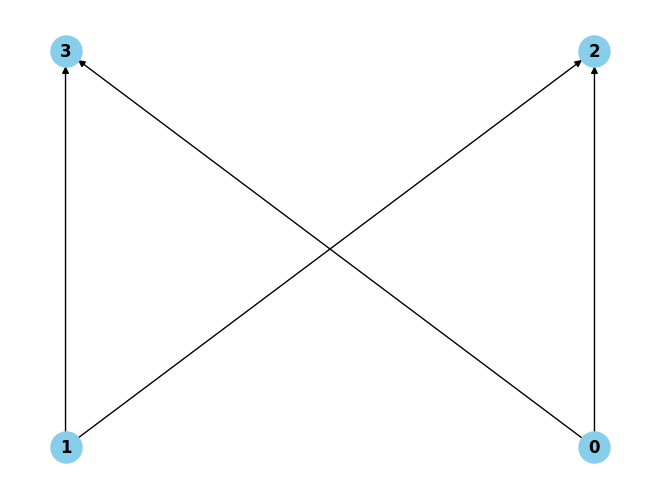

In [4]:
topology_2 = {'0': ['input', 'None', [], ['2', '3']],
              '1': ['input', 'None', [], ['2', '3']], 
              '2': ['output', 'identity', ['0', '1'], []],
              '3': ['output', 'identity', ['0', '1'], []]}
NeuralNetwork.display_topology(topology_2)

In [5]:
NN = NeuralNetwork(topology_2, -0.75, 0.75, True, RANDOM_STATE)
print(NN)

Instance Attributes:
input_size: 2
output_size: 2
neurons: [InputNeuron(index=1,
	type=input,
	successors=[2, 3, ],
	n_successors=2,
	last_predict=0.0,
	delta_error=0,
	old_weight_update=0,
	w=[0],
	), InputNeuron(index=0,
	type=input,
	successors=[2, 3, ],
	n_successors=2,
	last_predict=0.0,
	delta_error=0,
	old_weight_update=0,
	w=[0],
	), OutputNeuron(index=3,
	type=output,
	predecessors=[0, 1, ],
	n_predecessors=2,
	w=[ 0.26438201 -0.16333567 -0.25077911],
	f=<function ActivationFunctions.identity at 0x000001EB95CE3380>,
	f_parameters=[0.0, 1.0],
	net=0.0,
	last_predict=0.0,
	delta_error=0.0,
	partial_weight_update=[0. 0. 0.],
	old_weight_update=[0. 0. 0.],
	), OutputNeuron(index=2,
	type=output,
	predecessors=[0, 1, ],
	n_predecessors=2,
	w=[-0.40899597 -0.27486249  0.44604819],
	f=<function ActivationFunctions.identity at 0x000001EB95CE3380>,
	f_parameters=[0.0, 1.0],
	net=0.0,
	last_predict=0.0,
	delta_error=0.0,
	partial_weight_update=[0. 0. 0.],
	old_weight_update=[0. 0. 0.],


In [6]:
tr_1_input = 2
tr_1_output = 2
len_dataset = 1000
tr_1 = create_dataset(len_dataset, tr_1_input, [0, 1000, 1], [lambda x : 2*x[0] + x[1] + 0.345, lambda x : -2*x[0] + x[1] - 1.12], RANDOM_STATE)
tr_1.sample(10, random_state=RANDOM_STATE)

,input_1,input_2,output_1,output_2
144,139.0,943.0,1221.345,663.88
833,53.0,944.0,1050.345,836.88
270,24.0,825.0,873.345,775.88
468,298.0,994.0,1590.345,396.88
962,624.0,395.0,1643.345,-854.12
186,796.0,532.0,2124.345,-1061.12
942,394.0,919.0,1707.345,129.88
516,857.0,365.0,2079.345,-1350.12
286,596.0,808.0,2000.345,-385.12
458,285.0,249.0,819.345,-322.12


In [7]:
scaler_out = MinMaxScaler()
scaler_in = MinMaxScaler()
scaler_in.fit(tr_1.values[:,:tr_1_input])
scaler_out.fit(tr_1.values[:,tr_1_input:])
tr_1_normalized = np.empty((len_dataset, tr_1_output+tr_1_input))
tr_1_normalized[:,:tr_1_input] = scaler_in.transform(tr_1.values[:,:tr_1_input])
tr_1_normalized[:,tr_1_input:] = scaler_out.transform(tr_1.values[:,tr_1_input:])

In [8]:
tr_1_normalized

array([[0.42685371, 0.75025075, 0.54526749, 0.63054696],
       [0.01002004, 0.83951856, 0.29046639, 0.94736842],
       [0.84669339, 0.8224674 , 0.85733882, 0.36704506],
       ...,
       [0.56913828, 0.72417252, 0.63374486, 0.52390781],
       [0.77154309, 0.38114343, 0.65500686, 0.26728586],
       [0.19539078, 0.75225677, 0.38751715, 0.79016168]])

In [9]:
training_set = tr_1.values

batch_size = 100
max_epochs = 1000
error_decrease_tolerance = 0.0001
patience = 5

learning_rate = 0.01/batch_size
lambda_tikhonov = 0
alpha_momentum = 0

stats = NN.train_2(tr_1_normalized, batch_size, max_epochs, error_decrease_tolerance, patience, 
                   learning_rate, lambda_tikhonov, alpha_momentum)

In [10]:
predictions = scaler_out.inverse_transform(NN.predict_array(tr_1_normalized[:,:tr_1_input]))

In [11]:
for key in list(stats.keys())[:9]:
    print(key, ':', stats[key])

training_set_len : 1000
minibatch_size : 100
max_epochs : 1000
error_decrease_tolerance : 0.0001
patience : 5
learning_rate : 0.0001
lambda_tikhonov : 0
alpha_momentum : 0
epochs : 1000


In [12]:
stats['training_error']

[0.8701730142206769,
 0.7024627808623857,
 0.577897774520892,
 0.4851580376735136,
 0.41589727811741195,
 0.3639616236983432,
 0.32481363236787,
 0.2951076304613105,
 0.27237662055802797,
 0.25480144620540685,
 0.24104060220348072,
 0.23010475713662634,
 0.22126424102712774,
 0.2139808373210219,
 0.20785749386902094,
 0.20260124518151787,
 0.19799587508878602,
 0.19388176082921393,
 0.19014101189780627,
 0.18668651266050207,
 0.1834538431852046,
 0.18039532217289644,
 0.17747561451745314,
 0.17466849247878422,
 0.17195444743240473,
 0.16931892876866703,
 0.16675104520981726,
 0.16424260708778463,
 0.16178742003143795,
 0.15938076403584434,
 0.1570190092299847,
 0.15469933244699724,
 0.15241950812935579,
 0.15017775405297668,
 0.14797261747975393,
 0.1458028911271784,
 0.14366755113018445,
 0.14156571122496706,
 0.13949658889948047,
 0.13745948037241787,
 0.13545374208620048,
 0.13347877700692043,
 0.13153402447211165,
 0.12961895265754567,
 0.12773305297785773,
 0.12587583591547352,
 0

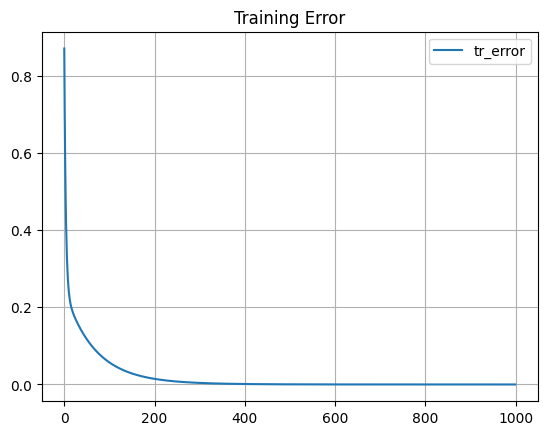

In [13]:
multy_plot([stats['training_error']], ['tr_error'], 'Training Error')

In [14]:
np.array(stats['units_weights'][2]).T

array([[-0.33313287, -0.26754354, -0.21077841, ...,  0.66438263,
         0.66439341,  0.66440413],
       [-0.23311756, -0.19666883, -0.164774  , ...,  0.34483331,
         0.34482345,  0.34481365],
       [ 0.4736304 ,  0.49587953,  0.51356078, ..., -0.68476705,
        -0.68477785, -0.68478859]])

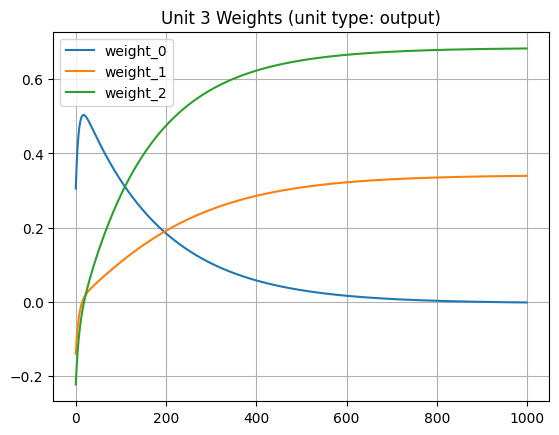

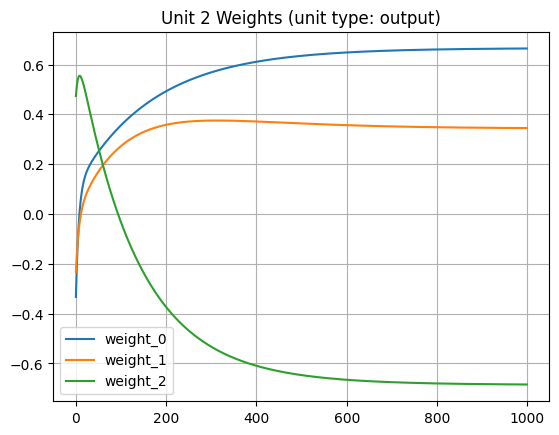

In [15]:
for unit_index in stats['units_weights'].keys():
    vals = np.array(stats['units_weights'][unit_index]).T
    multy_plot(vals, 
               ['weight_' + str(i) for i in range(len(vals))], 
               'Unit ' + str(unit_index) + ' Weights (unit type: ' + NN.neurons[unit_index].type + ')')

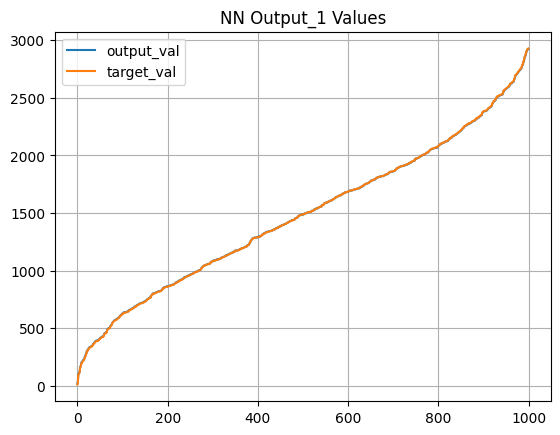

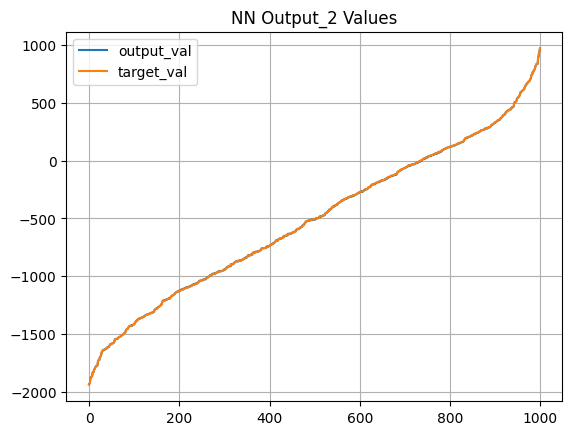

In [16]:
for i in range(tr_1_output):
    sorted_order = training_set[:, tr_1_input + i].argsort()
    multy_plot([predictions[sorted_order][:,i] , training_set[sorted_order][:,tr_1_input + i]], 
                ['output_val', 'target_val'], 
                'NN Output_' + str(i + 1) +  ' Values')

In [17]:
NN = NeuralNetwork(topology_2, -0.75, 0.75, True, RANDOM_STATE)

tr_2 = create_dataset(len_dataset, tr_1_input, [0, 50, 1], [lambda x : -3*x[0] + x[1]**2 + 15, lambda x : 2*x[0] + 15*x[1] - 50], RANDOM_STATE)
tr_2.sample(10, random_state=RANDOM_STATE)

scaler_2_out = MinMaxScaler()
scaler_2_in = MinMaxScaler()
scaler_2_in.fit(tr_2.values[:,:2])
scaler_2_out.fit(tr_2.values[:,2:])
tr_2_normalized = np.empty((len_dataset, tr_1_output+tr_1_input))
tr_2_normalized[:,:2] = scaler_2_in.transform(tr_2.values[:,:2])
tr_2_normalized[:,2:] = scaler_2_out.transform(tr_2.values[:,2:])

training_set = tr_2.values
stats = NN.train_2(tr_2_normalized, batch_size, max_epochs, error_decrease_tolerance, patience, 
                   learning_rate, lambda_tikhonov, alpha_momentum)
predictions = scaler_2_out.inverse_transform(NN.predict_array(tr_2_normalized[:,:2]))

In [18]:
for key in list(stats.keys())[:9]:
    print(key, ':', stats[key])

training_set_len : 1000
minibatch_size : 100
max_epochs : 1000
error_decrease_tolerance : 0.0001
patience : 5
learning_rate : 0.0001
lambda_tikhonov : 0
alpha_momentum : 0
epochs : 628


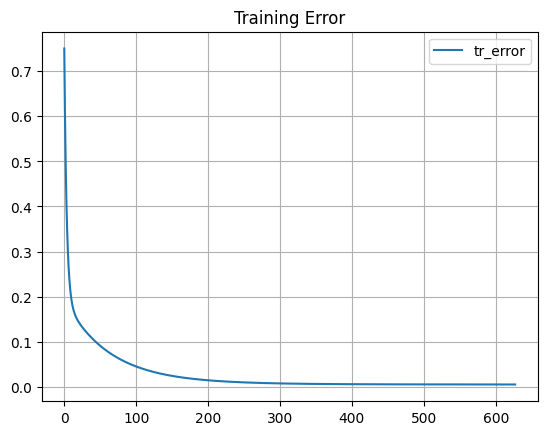

In [19]:
multy_plot([stats['training_error']], ['tr_error'], 'Training Error')

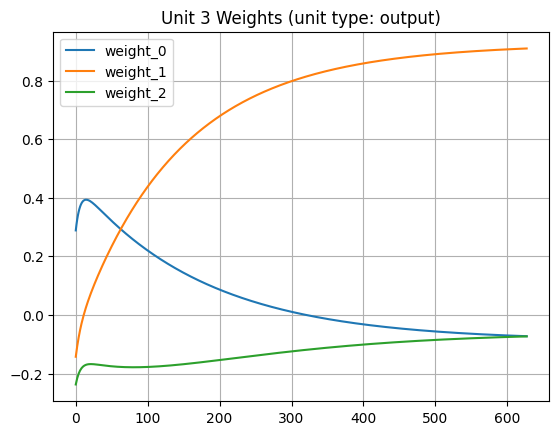

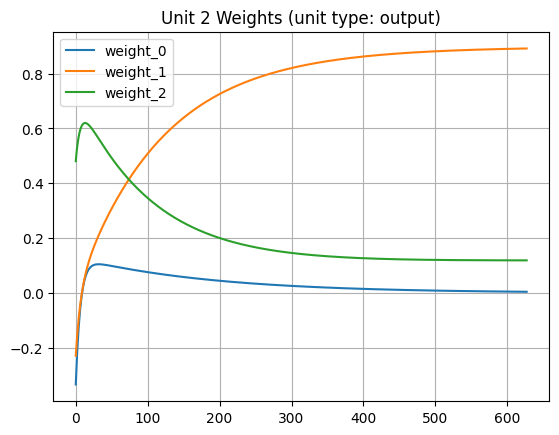

In [20]:
for unit_index in stats['units_weights'].keys():
    vals = np.array(stats['units_weights'][unit_index]).T
    multy_plot(vals, 
               ['weight_' + str(i) for i in range(len(vals))], 
               'Unit ' + str(unit_index) + ' Weights (unit type: ' + NN.neurons[unit_index].type + ')')

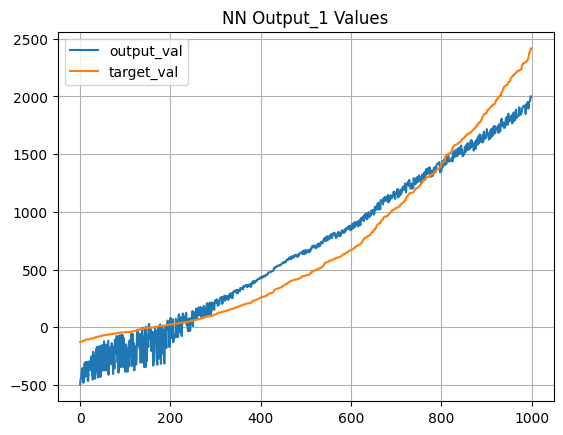

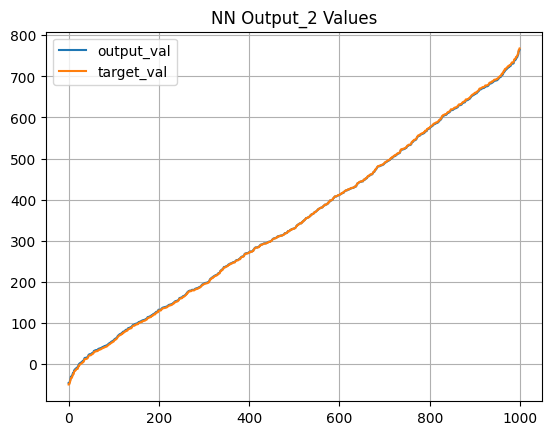

In [21]:
for i in range(tr_1_output):
    sorted_order = training_set[:, tr_1_input + i].argsort()
    multy_plot([predictions[sorted_order][:,i] , training_set[sorted_order][:,tr_1_input + i]], 
                ['output_val', 'target_val'], 
                'NN Output_' + str(i + 1) +  ' Values')